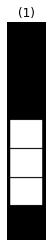

0


In [16]:
from commonfunctions import *
import skimage as sk
import numpy as np
import matplotlib as mp
import scipy as sp
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import os


from commonfunctions import *
import skimage as sk
import numpy as np
import matplotlib as mp
import scipy as sp
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import cv2 as cv
from skimage.feature import hog
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import os
import random


def check_chord_or_beam(img_input, staff_space):
    '''
        **img is assumed to be binarized
        returns:
            0 --> chord
            1 --> beam /16
            2 --> beam /32
           -1 --> neither
    '''

    se = sk.morphology.disk(staff_space//2)
    img = sk.morphology.binary_opening(img_input, se)
    img = sk.morphology.binary_erosion(img, se)
    img = sk.morphology.binary_erosion(img)
    se = sk.morphology.disk(staff_space//4)
    img = sk.morphology.binary_dilation(img, se)
    bounding_boxes = sk.measure.find_contours(img, 0.8)

    if len(bounding_boxes) < 2:
        return -1

    newImg = img.copy()
    centers, count_disks_spacing = [], 0

    for box in bounding_boxes:
        [Xmin, Xmax, Ymin, Ymax] = [np.min(box[:, 1]), np.max(
            box[:, 1]), np.min(box[:, 0]), np.max(box[:, 0])]
        rr, cc = sk.draw.rectangle(
            start=(Ymin, Xmin), end=(Ymax, Xmax), shape=newImg.shape)
        rr, cc = rr.astype(int), cc.astype(int)
        newImg[rr, cc] = 1
        centers.append([Ymin+Ymin//2, Xmin+Xmin//2])

    for i in range(1, len(centers)):
        if abs(centers[i][1] - centers[i-1][1]) > 70:
            count_disks_spacing += 1

    if count_disks_spacing != len(centers)-1:
        return 0
    
    img = sk.img_as_bool(img_input)
    img = sk.morphology.thin(img)

    h, theta, d = sk.transform.hough_line(img)
    angels= np.array([])
    for _, angle, dist in zip(*sk.transform.hough_line_peaks(h, theta, d)):
        angels=np.append(angels,np.rad2deg(angle))

    number_of_lines = np.sum(np.abs(angels) > 10)
    
    if number_of_lines < 1 or number_of_lines > 2:
        return -1
    else:
         return number_of_lines
        

# 1 & 3 & 4 & 5 --> 36
# 2 --> 17
img2 = io.imread("chord2.png", as_gray=True)
print(check_chord_or_beam(img2,17))